### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read in File and Clean Data

In [2]:
# Read CSV
csv_path = Path('../Resources/crypto_data.csv')
crypto_data = pd.read_csv(csv_path, index_col='data_date', parse_dates=True, infer_datetime_format=True)
crypto_data

# Drop all columns cryptocurrency and data_priceUsd
crypto_data = crypto_data.drop(columns=['data_time','timestamp'])

# Drop missing values
crypto_data = crypto_data.dropna()
crypto_data.head()

,cryptocurrency,data_priceUsd
data_date,,
2017-05-10,bitcoin,1743.723523
2017-05-11,bitcoin,1828.678209
2017-05-12,bitcoin,1776.443919
2017-05-13,bitcoin,1714.964198
2017-05-14,bitcoin,1789.278913


### Group DataFrame and perform `count` aggregation

In [4]:
# Group by crypto data by cryptocurrency and perform count
crypto_data_grp = crypto_data.groupby('cryptocurrency').count()
crypto_data_grp

,data_priceUsd
cryptocurrency,
bitcoin,722
bitcoin-cash,639
ethereum,722
litecoin,728
ripple,728


### Group DataFrame without aggregate function

In [5]:
# Group by crypto data by cryptocurrency


,data_priceUsd
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


### Group DataFrame by `cryptocurrency` and calculate the average `data_priceUsd`

In [6]:
# Calculate average data_priceUsd for each crypto
crypto_data_grp = crypto_data.groupby('cryptocurrency').mean()
crypto_data_grp

,data_priceUsd
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


### Group by more than one column and calculate count

In [8]:
# Group by more than one column
multi_group = crypto_data.groupby(['cryptocurrency','data_priceUsd'])['data_priceUsd'].count()
multi_group

cryptocurrency  data_priceUsd
bitcoin         1714.964198      1
                1742.722945      1
                1743.723523      1
                1776.443919      1
                1789.278913      1
                                ..
ripple          2.507770         1
                2.665656         1
                2.667044         1
                2.709364         1
                2.999459         1
Name: data_priceUsd, Length: 3539, dtype: int64

### Compare single column grouping to multicolumn grouping

In [7]:
# Compare one column group with multiple column group


### Plot grouped data to generate more than one line on the same chart

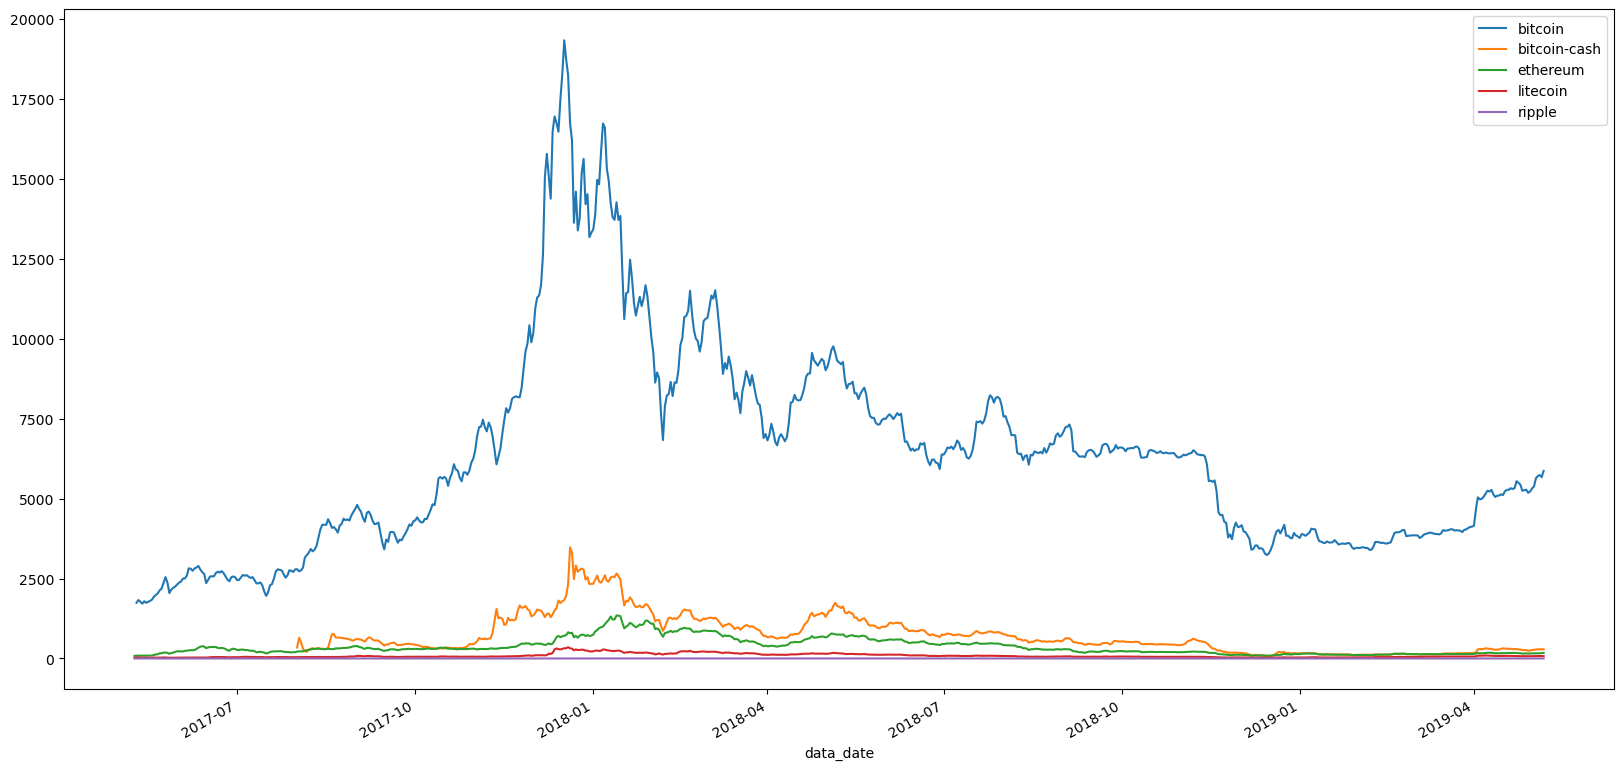

In [10]:
# Plot data_priceUsd for each crypto across time
group_data = crypto_data.groupby('cryptocurrency')['data_priceUsd'].plot(figsize=(20,10), legend = True)